In [39]:
# Getting started with airborne data from the NASA ASIA-AQ field campaign
# Author: Katie Travis (katherine.travis@nasa.gov)
# Created: 4/12/2024
# Updates:


In [42]:
# Mount Google Drive. To make this work for your own drive, create a folder in the top level called ASIA-AQDC8, and put the aircraft files there from 2/13.
# Get the files from here: https://www-air.larc.nasa.gov/cgi-bin/ArcView/asiaaq?DC8=1
from google.colab import drive
drive.mount('/content/drive')# if you need to remount after adding files, use this in the drive.mount call: , force_remount=True)

Mounted at /content/drive


In [44]:
# Christoph Knote made a nice reader for data in ICARTT format.
# ICARTT files are csv files but with specific requirements for NASA data. The header of an ICARTT file has information
# including the PI, instrument, contact information, data usage instructions etc.  Open an ICARTT file in TextEdit or similar
# application and read the header before using the data.
#
#!pip install icartt # do this the first time to get the icartt package, then comment out
import icartt # reader for aircraft data
import pandas as pd #python package for making easy to use data structures
from datetime import datetime, timedelta # for working with time variables
import os # for opening files
import geopandas as gpd # package for geo-referencing data for plotting on a map
import matplotlib.pyplot as plt # plotting package
from matplotlib import gridspec # plotting subplots
#!pip install contextily first time run this then comment out
import contextily as ctx # backage for basemaps

In [45]:
# Directory where my ASIA-AQ DC-8 files are for the Philippines
os.listdir('/content/drive/MyDrive/ASIA-AQDC8/')

['asiaaq-mrg1_dc8_20240213_RA_20240422T155951.ict']

In [46]:
# Lets look at PM2.5 along the flight track in the Philippines on 2/13th.  We need the PM2.5 data from one of the instruments and the aircraft position data.
f1='/content/drive/MyDrive/ASIA-AQDC8/asiaaq-mrg1_dc8_20240213_RA_20240422T155951.ict'

# Read in the merge file for 2/13 that I made with the AMS and SP2 data
ict = icartt.Dataset(f1)
aircraft = ict.data[:]# get data out of dataset
aircraft = pd.DataFrame(aircraft)# make into a Pandas dataframe for easy manipulation
aircraft

/usr/local/lib/python3.10/dist-packages/icartt/dataset.py:392: UserWarning: Variable short name NR_Chloride_prec_PM1_AMS_JIMENEZ does not comply with ICARTT standard v2
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/icartt/dataset.py:392: UserWarning: Variable short name OrgNitr_Fraction_PM1_AMS_JIMENEZ does not comply with ICARTT standard v2
  warnings.warn(


,Time_Start,Time_Stop,Day_Of_Year,Latitude,Longitude,Pressure_Altitude,Static_Air_Temp,Static_Pressure,Solar_Zenith_Angle,LAT_AMS_JIMENEZ,...,f60_PM1_AMS_JIMENEZ,f82_PM1_AMS_JIMENEZ,f91_PM1_AMS_JIMENEZ,fC2H3O_PM1_AMS_JIMENEZ,fCO2_PM1_AMS_JIMENEZ,fC4H9_PM1_AMS_JIMENEZ,fC2H4O2_PM1_AMS_JIMENEZ,fC5H6O_PM1_AMS_JIMENEZ,fC7H7_PM1_AMS_JIMENEZ,BC_mass_MOORE
0,3991.0,3992.0,44.0,15.175041,120.558062,264.0,27.67,1003.62,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3992.0,3993.0,44.0,15.175044,120.558064,265.0,27.52,1003.58,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3993.0,3994.0,44.0,15.175055,120.558069,266.0,27.32,1003.55,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3994.0,3995.0,44.0,15.175085,120.558079,267.0,27.21,1003.51,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3995.0,3996.0,44.0,15.175121,120.558094,269.0,27.40,1003.44,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29715,33706.0,33707.0,44.0,15.190904,120.561294,316.0,30.32,1001.73,81.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29716,33707.0,33708.0,44.0,15.190888,120.561253,316.0,30.27,1001.73,81.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29717,33708.0,33709.0,44.0,15.190879,120.561211,316.0,30.27,1001.73,81.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29718,33709.0,33710.0,44.0,15.190873,120.561168,317.0,30.27,1001.70,81.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
aircraft.columns # get all variable names we need

Index(['Time_Start', 'Time_Stop', 'Day_Of_Year', 'Latitude', 'Longitude',
       'Pressure_Altitude', 'Static_Air_Temp', 'Static_Pressure',
       'Solar_Zenith_Angle', 'LAT_AMS_JIMENEZ', 'LON_AMS_JIMENEZ',
       'ALT_AMS_JIMENEZ', 'OA_PM1_AMS_JIMENEZ', 'OA_prec_PM1_AMS_JIMENEZ',
       'OA_DL_PM1_AMS_JIMENEZ', 'Sulfate_PM1_AMS_JIMENEZ',
       'Sulfate_prec_PM1_AMS_JIMENEZ', 'Sulfate_DL_PM1_AMS_JIMENEZ',
       'Nitrate_PM1_AMS_JIMENEZ', 'Nitrate_prec_PM1_AMS_JIMENEZ',
       'Nitrate_DL_PM1_AMS_JIMENEZ', 'Ammonium_PM1_AMS_JIMENEZ',
       'Ammonium_prec_PM1_AMS_JIMENEZ', 'Ammonium_DL_PM1_AMS_JIMENEZ',
       'NR_Chloride_PM1_AMS_JIMENEZ', 'NR_Chloride_prec_PM1_AMS_JIMENEZ',
       'NR_Chloride_DL_PM1_AMS_JIMENEZ', 'Seasalt_PM1_AMS_JIMENEZ',
       'Seasalt_prec_PM1_AMS_JIMENEZ', 'Seasalt_DL_PM1_AMS_JIMENEZ',
       'MSA_PM1_AMS_JIMENEZ', 'MSA_prec_PM1_AMS_JIMENEZ',
       'MSA_DL_PM1_AMS_JIMENEZ', 'ClO4_PM1_AMS_JIMENEZ',
       'ClO4_prec_PM1_AMS_JIMENEZ', 'ClO4_DL_PM1_AMS_JIMENEZ',

In [50]:
# The AMS observes almost all the components of PM1, which should be very close to PM2.5. The only thing it does not have is BC which we get from the LARGE SP2.
# Let's not include seasalt, chloride, etc right now until we get a handle on the main components of OA + SO4 + NO3 + NH4 + BC
# From the header of each file, units of AMS are in ug/sm3 (273 K & 1013 mb), units of SP2 are in ng/sm3 (0 deg C, 1013.25 mb)
aircraft['PM1'] = aircraft['OA_PM1_AMS_JIMENEZ'] + aircraft['Sulfate_PM1_AMS_JIMENEZ'] + aircraft['Ammonium_PM1_AMS_JIMENEZ'] + aircraft['Nitrate_PM1_AMS_JIMENEZ'] + aircraft['BC_mass_MOORE']/1E3
aircraft['PM1']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
29715   NaN
29716   NaN
29717   NaN
29718   NaN
29719   NaN
Name: PM1, Length: 29720, dtype: float64

In [68]:
# Convert DataFrame to GeoDataFrame
aircraft_gdf = gpd.GeoDataFrame(aircraft, geometry=gpd.points_from_xy(aircraft['Longitude'], aircraft['Latitude']))
# Set the coordinate reference system (CRS) to WGS84 (lat/lon)
aircraft_gdf.crs = 'EPSG:4326'
# For plotting low-level data
subset = aircraft_gdf[aircraft_gdf['Pressure_Altitude'] < 100]
subset

,Time_Start,Time_Stop,Day_Of_Year,Latitude,Longitude,Pressure_Altitude,Static_Air_Temp,Static_Pressure,Solar_Zenith_Angle,LAT_AMS_JIMENEZ,...,f91_PM1_AMS_JIMENEZ,fC2H3O_PM1_AMS_JIMENEZ,fCO2_PM1_AMS_JIMENEZ,fC4H9_PM1_AMS_JIMENEZ,fC2H4O2_PM1_AMS_JIMENEZ,fC5H6O_PM1_AMS_JIMENEZ,fC7H7_PM1_AMS_JIMENEZ,BC_mass_MOORE,PM1,geometry
634,4625.0,4626.0,44.0,14.907186,120.850997,99.0,26.32,1009.63,51.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433.95,NaN,POINT (120.85100 14.90719)
635,4626.0,4627.0,44.0,14.906357,120.851093,89.0,26.36,1010.00,51.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,658.10,NaN,POINT (120.85109 14.90636)
636,4627.0,4628.0,44.0,14.905527,120.851185,78.0,26.45,1010.40,51.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,706.05,NaN,POINT (120.85119 14.90553)
637,4628.0,4629.0,44.0,14.904698,120.851271,68.0,26.57,1010.76,51.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423.55,NaN,POINT (120.85127 14.90470)
638,4629.0,4630.0,44.0,14.903871,120.851354,59.0,26.61,1011.09,51.8,14.9018,...,0.009500,0.028700,0.07340,0.021300,0.006000,0.003200,0.008600,403.95,15.633950,POINT (120.85135 14.90387)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27484,31475.0,31476.0,44.0,16.035841,120.245309,39.0,32.56,1011.82,73.0,16.0362,...,0.007164,0.021717,0.11172,0.008313,0.003320,0.001401,0.006542,350.60,9.160610,POINT (120.24531 16.03584)
27485,31476.0,31477.0,44.0,16.036021,120.245954,46.0,32.48,1011.57,73.0,16.0364,...,0.004920,0.023980,0.16190,0.010940,0.003020,0.000800,0.005260,384.95,5.270830,POINT (120.24595 16.03602)
27486,31477.0,31478.0,44.0,16.036200,120.246598,56.0,32.51,1011.20,73.0,16.0366,...,0.004274,0.026557,0.16190,0.007468,0.001347,0.000537,0.004070,441.50,6.055110,POINT (120.24660 16.03620)
27487,31478.0,31479.0,44.0,16.036382,120.247239,68.0,32.40,1010.76,73.0,16.0367,...,0.003282,0.021282,0.16190,0.010936,0.001191,0.002473,0.003536,484.35,5.450175,POINT (120.24724 16.03638)


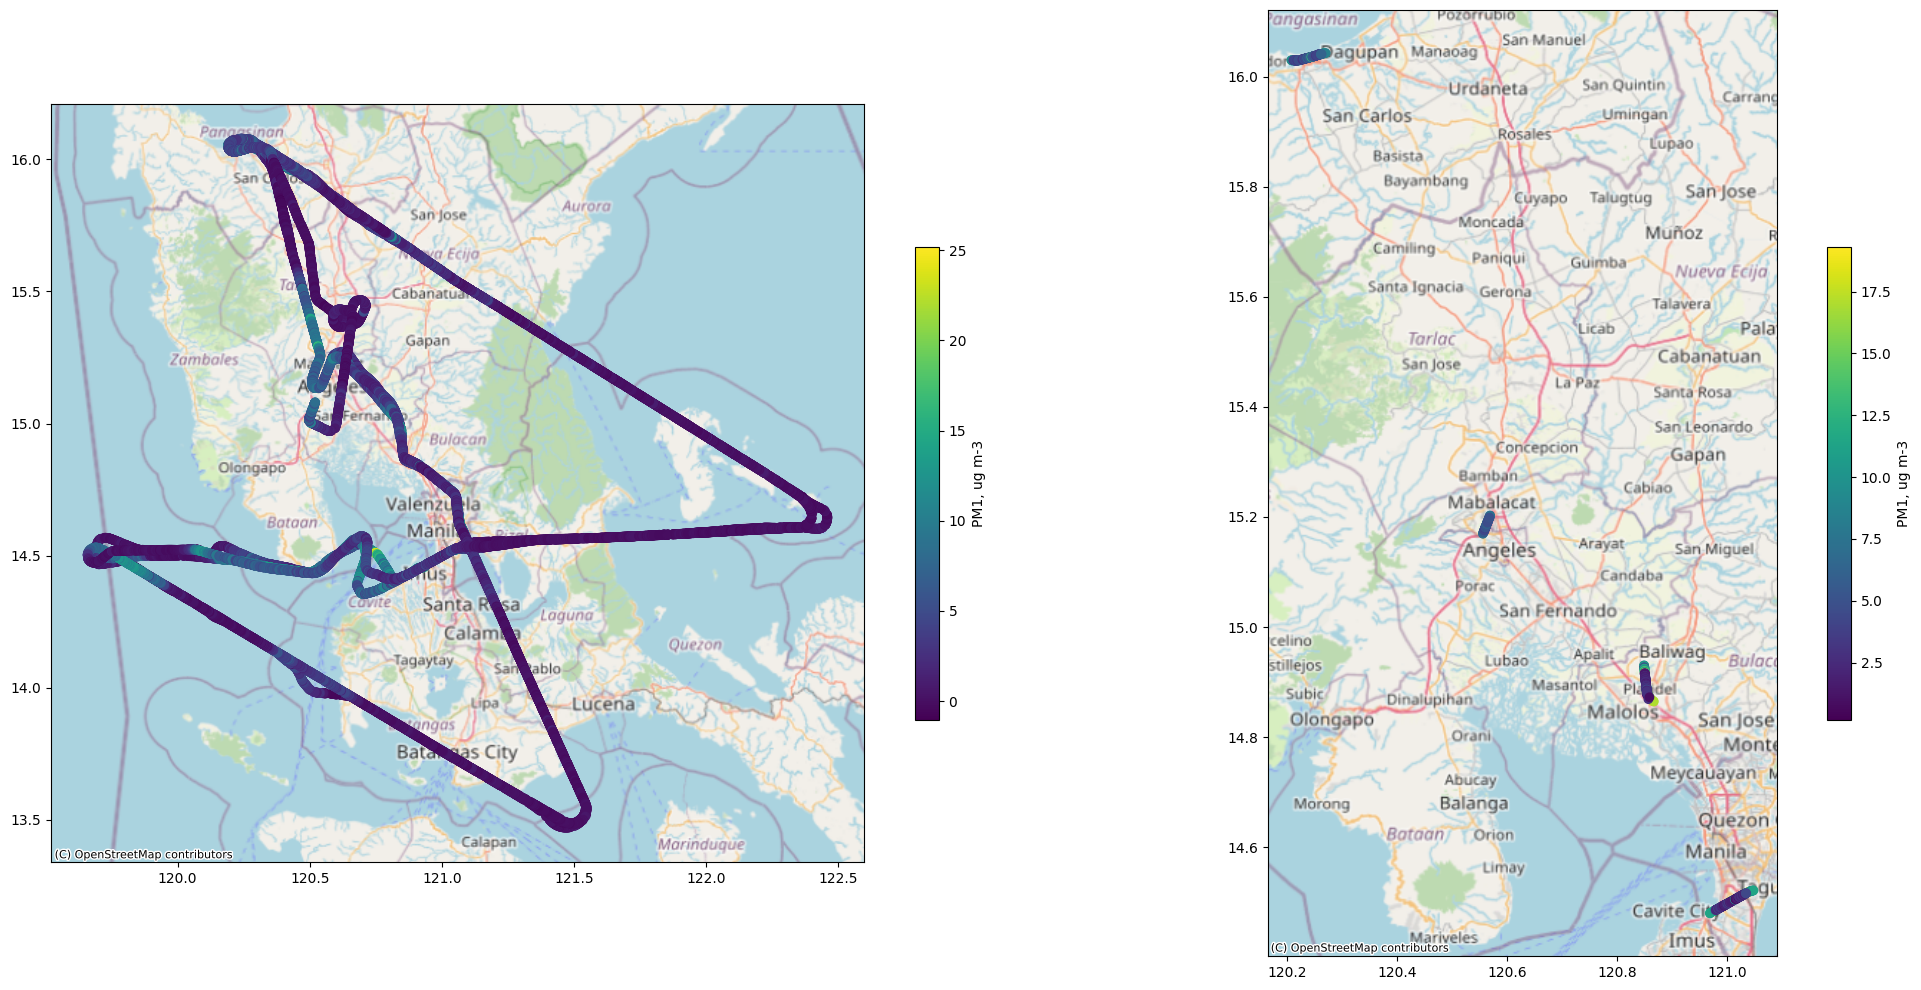

In [69]:
# Set a colormap for the data
cmap = plt.get_cmap('viridis')

# Set up a plot
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Equal width for both subplots

# Plot the entire flight
ax1 = fig.add_subplot(gs[0])

# Use normalization for consistent coloring
aircraft_gdf.plot(ax=ax1, column='PM1', cmap=cmap, legend=True, legend_kwds={'label': "PM1, ug m-3", 'shrink': 0.5})
# Add basemap
ctx.add_basemap(ax1, crs=aircraft_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
subset = aircraft_gdf[aircraft_gdf['Pressure_Altitude'] < 500]

# Second subplot for just data below 100 m
ax2 = fig.add_subplot(gs[1])
# Use normalization for consistent coloring
subset.plot(ax=ax2, column='PM1', cmap=cmap, legend=True, legend_kwds={'label': "PM1, ug m-3", 'shrink': 0.5})
# Add basemap
ctx.add_basemap(ax2, crs=subset.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.subplots_adjust(wspace=0.3)  # Adjust horizontal space between plots
plt.tight_layout()